<a href="https://colab.research.google.com/github/qamtam/Hands-on-machine-learning/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] /255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_test[10]

4

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7200 - accuracy: 0.7600 - val_loss: 0.5251 - val_accuracy: 0.8232
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4867 - accuracy: 0.8316 - val_loss: 0.4442 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4408 - accuracy: 0.8451 - val_loss: 0.4305 - val_accuracy: 0.8484
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4142 - accuracy: 0.8531 - val_loss: 0.3880 - val_accuracy: 0.8688
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3932 - accuracy: 0.8611 - val_loss: 0.3808 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3769 - accuracy: 0.8654 - val_loss: 0.3728 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3643 - accuracy: 0.8704 - val_loss: 0.3690 - val_accuracy:

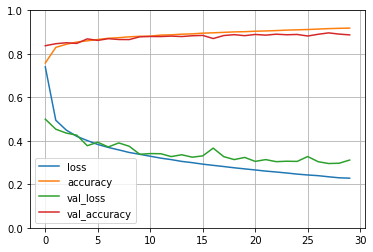

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 78.6079 - accuracy: 0.8355


[78.60787963867188, 0.8355000019073486]

In [ ]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8100 - val_loss: 0.5245
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5455 - val_loss: 0.4730
Epoch 3/20
363/363 [==============================] - 0s 981us/step - loss: 0.4848 - val_loss: 0.4547
Epoch 4/20
363/363 [==============================] - 0s 991us/step - loss: 0.5064 - val_loss: 0.4347
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4443 - val_loss: 0.4227
Epoch 6/20
363/363 [==============================] - 0s 997us/step - loss: 0.4342 - val_loss: 0.4251
Epoch 7/20
363/363 [==============================] - 0s 997us/step - loss: 0.4262 - val_loss: 0.4182
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4424 - val_loss: 0.4163
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4199 - val_loss: 0.4045
Epoch 10/20
363/363 [==============================] - 0s 994us/step - loss: 0.4233 - val_lo

In [ ]:
inputa = X_train.shape[1]
inputa

8

In [ ]:
inputa = X_train.shape[1:]
inputa

(8,)

In [ ]:
import keras.callbacks
import keras.wrappers
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100, 
          validation_data=(X_valid, y_valid),
          callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test[:3])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.1015 - val_loss: 0.6170
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6130 - val_loss: 0.5435
Epoch 3/100
363/363 [==============================] - 0s 991us/step - loss: 0.5520 - val_loss: 0.5067
Epoch 4/100
363/363 [==============================] - 0s 985us/step - loss: 0.5188 - val_loss: 0.4902
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4989 - val_loss: 0.4714
Epoch 6/100
363/363 [==============================] - 0s 994us/step - loss: 0.4829 - val_loss: 0.4596
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4727 - val_loss: 0.4554
Epoch 8/100
363/363 [==============================] - 0s 995us/step - loss: 0.4673 - val_loss: 0.4473
Epoch 9/100
363/363 [==============================] - 0s 966us/step - loss: 0.4599 - val_loss: 0.4492
Epoch 10/100
363/363 [==============================] - 0s 986us/step - loss: 0.4

In [ ]:
X_test[:3]

array([ 0.09783757,  1.22092545,  0.1144472 , -0.05134974, -0.51752572,
       -0.03371614,  1.07971026, -1.38340724])

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
        callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.3773 - val_loss: 0.6922
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5806 - val_loss: 0.5897
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5482 - val_loss: 0.5871
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5393 - val_loss: 0.5892
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5326 - val_loss: 0.5947
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5271 - val_loss: 0.6012
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5230 - val_loss: 0.6091
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5194 - val_loss: 0.6178
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5170 - val_loss: 0.6287
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5148 - val_lo

RuntimeError: ignored

In [ ]:
mnist = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist[0][0][5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [ ]:
X_train_full, X_test = X_train_full/255.0, X_test/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid)
                    )

Epoch 1/50
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2174 - accuracy: 0.9317 - val_loss: 0.1404 - val_accuracy: 0.9551
Epoch 2/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0984 - accuracy: 0.9696 - val_loss: 0.0974 - val_accuracy: 0.9711
Epoch 3/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0662 - accuracy: 0.9785 - val_loss: 0.1164 - val_accuracy: 0.9681
Epoch 4/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.1093 - val_accuracy: 0.9711
Epoch 5/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0864 - val_accuracy: 0.9768
Epoch 6/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0907 - val_accuracy: 0.9777
Epoch 7/50
1407/1407 [==============================] - 15s 10ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.1043 -

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2184 - accuracy: 0.9803


[0.21835169196128845, 0.9803000092506409]

In [ ]:
K = keras.backend
class ExponentialLR(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.lr))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

import keras.layers as l

exp = ExponentialLR(factor = 1.005)
model = keras.models.Sequential([
                                 l.Flatten(input_shape=[28,28]),
                                 l.Dense(300, activation="relu"),
                                 l.Dense(300, activation="relu"),
                                 l.Dense(100, activation="relu"),
                                 l.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[exp])

1407/1407 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.6470 - val_loss: nan - val_accuracy: 0.0974


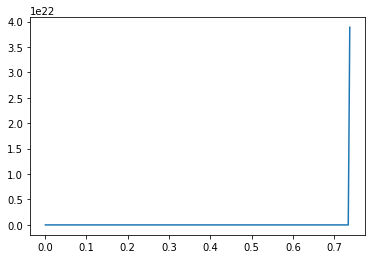

In [ ]:
plt.plot(exp.rates, exp.losses)



In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

import os
run_index = 6
run_logdir = os.path.join(os.curdir, "mylogs", "run_{:03d}".format(run_index))
run_logdir

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model5.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

moooodel = keras.models.load_model("my_model.h5")
moooodel.evaluate(X_test, y_test)

Epoch 1/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2596 - accuracy: 0.9195 - val_loss: 0.1389 - val_accuracy: 0.9599
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1071 - accuracy: 0.9663 - val_loss: 0.2299 - val_accuracy: 0.9386
Epoch 3/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0727 - accuracy: 0.9764 - val_loss: 0.1067 - val_accuracy: 0.9683
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0494 - accuracy: 0.9835 - val_loss: 0.0883 - val_accuracy: 0.9748
Epoch 5/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0845 - val_accuracy: 0.9771
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0900 - val_accuracy: 0.9756
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.1015 - val_ac

[0.0732569471001625, 0.09860000014305115]